In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import  seaborn as sns
sns.set()

In [25]:
# load dataset 
url = "https://raw.githubusercontent.com/Pankaj-Str/Complete-Python-Mastery/refs/heads/main/00%20Lecture/lecture14/ML/11%20Dec%202025/DataSet/Mall_Customers.csv"
df = pd.read_csv(url)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [26]:
# select features clustering
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [27]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]]
# scale the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# apply DBSCAN
dbscan = DBSCAN(eps=0.25,min_samples=4)
labels = dbscan.fit_predict(X_scaled)

In [29]:
df['Cluster']= labels
print("unique cluster labels ",set(labels))
print(df.head())

unique cluster labels  {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(-1)}
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0       -1  
1        0  
2        1  
3        0  
4        2  


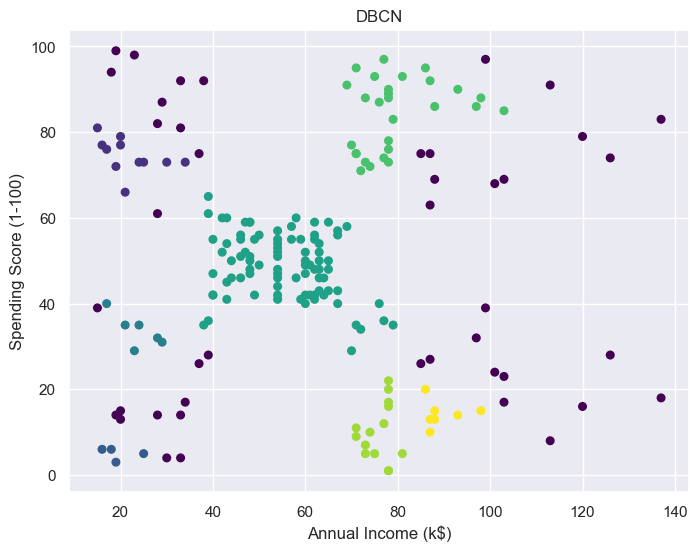

Values - Cluster Count
Cluster
 3    87
-1    43
 4    28
 5    14
 0    11
 6     7
 2     6
 1     4
Name: count, dtype: int64


In [30]:
# Visualize 
plt.figure(figsize=(8,6))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=df["Cluster"],cmap="viridis",s=30)
plt.title("DBCN")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()
print("Values - Cluster Count")
print(df["Cluster"].value_counts())